## Load parameters and calculate quiescent luminosity, assign spectral class and  if not already

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
import specmatchemp.library
import specmatchemp.plots as smplot
import glob
warnings.filterwarnings("ignore")

from f_6_7_8 import merged_spec_class, Mbol_to_Lum, kepler_luminosity, L_quieterr

cluster_dict = {'M67':['M67','M67', 15, 4.0, 850],
                'Ruprecht_147':['Ruprecht 147','Ruprecht_147', 30, 2.5, 300.],
                'M44':['M44','M44', 47, 0.73, 181.5],
                'M45':['M45','M45',55.,0.12,120.],
                'NGC_1647':['NGC 1647','NGC_1647',0.,0.145,550.],
                'Pleiades':['Pleiades','Pleiades',0.,0.100,136.]
               }
DM = lambda x: 5.*np.log10(float(x))-5. 

#------------------------------------------------
cluster = 'M44'
test = 'run_05'
#------------------------------------------------

basics = cluster_dict[cluster]
dm = DM(basics[4])
global dm
l = 'stars_shortlist/{0}/{0}_parameter.csv'.format(cluster)

#l = '/home/ekaterina/Documents/appaloosa/stars_shortlist/{0}/{0}_parameter.csv'.format(cluster)
print(glob.glob(l))

if glob.glob(l) != []:
    specs = pd.read_csv(l, index_col='EPIC')
    if 'L_quiet_bol_err' not in specs.columns.values:
        wavmin, wavmax = 3480., 9700.
        lib = specmatchemp.library.read_hdf(wavlim=[wavmin,wavmax])
        specs = merged_spec_class(specs)
        specs['L_quiet'] = np.nan
        specs['L_quiet_bol'] = np.nan
        specs['L_quiet_err'] = np.nan
        specs['L_quiet_bol_err'] = np.nan
        i=0
        for oid in specs.index.values:
            print(i,oid)
            i+=1
            specs.L_quiet_bol[oid] = Mbol_to_Lum(specs.Mbol[oid])
            specs.L_quiet_bol_err[oid] = Mbol_to_Lum(specs.Mbol[oid],
                                                     specs.Mbol_err[oid],
                                                     err=True,)
            specs.L_quiet[oid] = kepler_luminosity(specs['T'][oid],lib)
            try:
                specs.L_quiet_err[oid] = L_quieterr(specs.L_quiet[oid],
                                                specs.R_Rsun[oid],
                                                specs.R_Rsun_err[oid],
                                                specs['T'][oid],
                                                specs['T_err'][oid],
                                                lib,)
            except TypeError:
                specs.L_quiet_err[oid] = np.nan


print(specs.columns)


/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


['stars_shortlist/M44/M44_parameter.csv']
Index(['Unnamed: 0', 'angDist', 'gmag', 'rmag', 'imag', 'zmag', 'ymag', 'J',
       'H', 'K', 'RAJ2000', 'DEJ2000', 'spec_class', 'T', 'logT', 'BCv', 'Mv',
       'logL', 'B-V', 'Bt-Vt', 'V-G', 'U-B', 'V-Rc', 'V-Ic', 'V-Ks', 'J-H',
       'H-K', 'Ks-W1', 'W1-W2', 'W1-W3', 'W1-W4', 'Msun', 'logAge', 'b-y',
       'M_J', 'M_Ks', 'Mbol', 'i-z', 'z-Y', 'R_Rsun', '#SpT.1', 'lum_class',
       'u_g', 'g_r', 'r_i', 'i_z', 'z_J', 'J_H', 'H_K', 'Jmag_abs', 'T_err',
       'R_Rsun_err', 'Mbol_err', '72', 'L_quiet', 'L_quiet_bol', 'L_quiet_err',
       'L_quiet_bol_err', 'g_i', 'J_K', 'r_z', 'g_z', 'J-K'],
      dtype='object')


In [16]:
r = specs.L_quiet_err/specs.L_quiet
r.head()

EPIC
211389428    0.303129
211389537    0.306594
211389716    0.239467
211389931    0.290268
211390071    0.330304
dtype: float64

In [32]:
from f_6_7_8 import interactive_CMD
crs = {'g_i':('gmag','imag'),
       'J_K':('J','K'),
       'r_z':('rmag','zmag'),
       'g_z':('gmag','zmag'),}

for key, c in crs.items():
    print(c[0],c[1])
    interactive_CMD(specs,cid1=c[0],cid2=c[1])
    input('Plot for {} done?'.format(key))
    


rmag zmag
Plot for r_z done?
J K
Plot for J_K done?
gmag zmag
Plot for g_z done?
gmag imag
Plot for g_i done?


(3,)


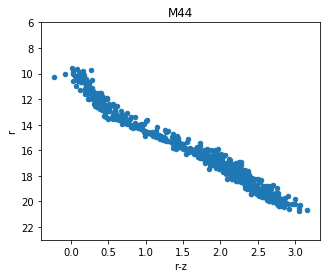

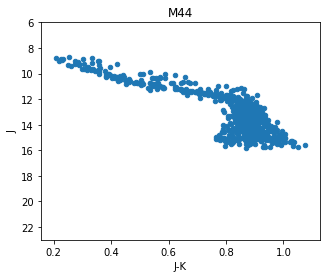

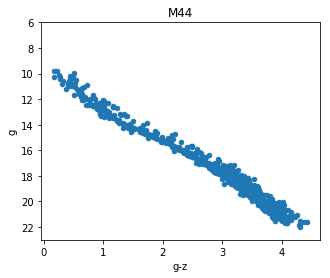

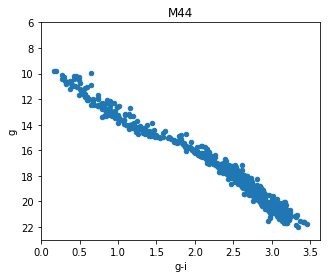

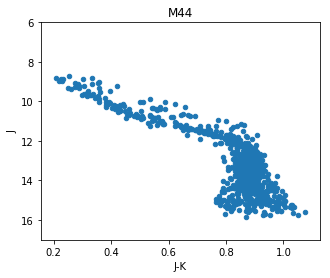

In [33]:
outs=pd.Series()
import os
from f_6_7_8 import CMD
for i in [1,2,3,4]:
    #/home/ekaterina/Documents/appaloosa/stars_shortlist/share/temp/
    file = 'selected-data_{}.txt'.format(i)
    if os.stat(file).st_size != 0:
        df = pd.read_csv(file,header=None,sep=' ').T.dropna(how='any')
        df = df.rename(index=str, columns={0:'outlier'})
        df.outlier = df.outlier.astype('int')
        s = df.outlier
        outs = pd.concat([outs,s],ignore_index=True)
outs = outs.drop_duplicates()
print(outs.shape)
for key, c in crs.items():
    CMD(specs,cluster,cid1=c[0],cid2=c[1],colour=key,ylim=(23,6),outliers=outs)
CMD(specs,cluster,cid1='J',cid2="K",colour="J-K",ylim=(17,6),outliers=outs)
outs.to_csv('stars_shortlist/{0}/{0}_outliers.csv'.format(cluster))

In [ ]:
from f_6_7_8 import CMD
for key, c in crs.items():
    CMD(specs,cluster,cid1=c[0],cid2=c[1],colour=key, ylim=(18,9))#,colour=key

In [2]:
outs = pd.read_csv('stars_shortlist/{0}/{0}_outliers.csv'.format(cluster),header=None)
print(specs.shape)
specs = specs.drop(list(outs[1]))
print(specs.shape)

(749, 63)
(746, 63)


In [23]:
specs[specs['T']<3000]

,Unnamed: 0,angDist,gmag,rmag,imag,zmag,ymag,J,H,K,...,58,L_quiet,L_quiet_bol,L_quiet_err,L_quiet_bol_err,r_z,J_K,g_z,g_i,J-K
EPIC,,,,,,,,,,,,,,,,,,,,,


In [24]:
specs = specs.dropna(how='any',subset=['T','L_quiet'])

In [3]:
print(specs.shape)

(746, 63)


In [4]:
l

'stars_shortlist/M44/M44_parameter.csv'

In [5]:
#intermediate save
specs.to_csv(l)

In [15]:
from pandas.api.types import CategoricalDtype
from f_6_7_8 import spec_class_hist
categor = ['{}{}'.format(c,num) for c in list('OBAFGKM') for num in list(range(10))]
type_ = CategoricalDtype(categories=categor, ordered=True)
specs.spec_class.astype(type_)
s = specs.sort_values(by='spec_class')
spec_class_hist(s,cluster,type_)

ImportError: No module named 'pandas.api'

In [28]:
specs = specs[specs.spec_class != 'F3']
#specs[specs.spec_class == 'G3']
#specs = specs[specs.spec_class != 'F4']
#specs[specs.spec_class == 'F5']
specs.groupby('spec_class').count()

,Unnamed: 0,angDist,gmag,rmag,imag,zmag,ymag,J,H,K,...,58,L_quiet,L_quiet_bol,L_quiet_err,L_quiet_bol_err,r_z,J_K,g_z,g_i,J-K
spec_class,,,,,,,,,,,,,,,,,,,,,
F8,1,1,1,1,1,1,1,0,0,0,...,0,1,1,1,1,1,0,1,1,0
F9,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2
G0,7,7,7,7,7,7,7,7,7,7,...,0,7,7,7,7,7,7,7,7,7
G1,5,5,5,5,5,5,5,5,5,5,...,0,5,5,5,5,5,5,5,5,5
G2,4,4,4,4,4,4,4,4,4,4,...,0,4,4,4,4,4,4,4,4,4
G3,8,8,8,8,8,8,8,8,8,8,...,0,8,8,8,8,8,8,8,8,8
G4,6,6,6,6,6,6,6,6,6,6,...,0,6,6,6,6,6,6,6,6,6
G5,9,9,9,9,9,9,9,9,9,9,...,0,9,9,9,9,9,9,9,9,9
G6,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


In [29]:
#remove all objects with spectral class hotter than F4
#specs = specs[specs.spec_class > 'F3']
specs.shape

(178, 64)

In [30]:
specs.to_csv(l)

In [ ]:
CMD(specs,cluster,cid1='gmag',cid2='imag',color='g_i',ylim=(21,8))#19,5
CMD(specs,cluster,cid1='J',cid2='K',color='J_K',ylim=(18,6))#14,5
CMD(specs,cluster,cid1='rmag',cid2='zmag',color='r_z',ylim=(20,8))#18,5
CMD(specs,cluster,cid1='gmag',cid2='zmag',color='g_z',ylim=(20,9))#18,5

In [28]:
specs.shape

(676, 63)